# Pair programming Estadística Descriptiva

## Ejercicios estadística descriptiva

En este caso usaremos el mismo DataFrame que hemos estado usando en los últimos pairs. El ejercicio que os planteamos es:

Eres un analista de datos que trabaja para una organización internacional que se enfoca en el desarrollo y el bienestar de los países. Tu objetivo es realizar un análisis inicial de estadísticas descriptivas sobre varios países utilizando el conjunto de datos proporcionado.

Objetivo: Realizar un análisis de estadísticas descriptivas para comprender mejor la situación de los países en términos de diversos indicadores.

## Instrucciones:

1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:

    Media

    Mediana

    Desviación estándar

    Mínimo

    Máximo

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option("display.float_format", "{:.2f}".format)

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv ('files/world_data_full_apply_nulos.csv', index_col = 0)

In [3]:
df.head(2)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.00,AF,58.10,652.23,323.00,32.49,93.00,Kabul,8.67,149.90,2.30,AFN,4.47,2.10,0.70,19101353833.00,104.00,9.70,47.90,Kabul,64.50,638.00,0.43,Pashto,78.40,0.28,NaN,48.90,9.30,71.40,11.12,NaN,33.94,67.71,Asia
1,Albania,105.00,AL,43.10,28.75,9.00,11.78,355.00,Tirana,4.54,119.05,1.40,ALL,1.62,28.10,1.36,15278077447.00,107.00,55.00,7.80,Tirana,78.50,15.00,1.12,Albanian,56.90,1.20,NaN,55.70,18.60,36.60,12.33,NaN,41.15,20.17,Europe


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
density,195.00,134.50,157.31,1.26,26.17,83.00,165.50,847.00
agricultural_land,188.00,39.12,21.78,0.60,21.70,39.60,55.38,82.60
land_area,165.00,255.21,258.39,0.00,41.28,148.46,430.00,964.00
armed_forces_size,166.00,103.78,167.16,0.00,10.25,28.50,128.25,936.00
birth_rate,189.00,20.21,9.95,5.90,11.30,17.95,28.75,46.08
calling_code,194.00,360.55,323.24,1.00,82.50,255.50,506.75,1876.00
co2-emissions,183.00,125.92,181.79,1.02,7.60,34.48,185.03,727.97
cpi,175.00,144.19,54.78,99.03,113.67,124.74,155.93,550.93
cpi_change,179.00,6.72,24.45,-4.30,1.00,2.30,4.25,254.90
fertility_rate,188.00,2.70,1.28,0.98,1.71,2.25,3.60,6.91


2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [47]:
df[df['density'] == df['density'].max()]

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent,cat_mortalidad,diff
133,Palestinian National Authority,847.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arabic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.95,35.23,Asia,alta,NaN


In [48]:
df[df['density'] == df['density'].min()]

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent,cat_mortalidad,diff
13,Bangladesh,1.26,BD,70.60,148.46,221.00,18.18,880.00,Dhaka,84.25,179.68,5.60,BDT,2.04,11.00,1.12,302571254131.00,116.50,20.60,25.10,Dhaka,72.30,173.00,0.51,Bengali,71.80,0.58,NaN,59.00,8.80,33.40,4.19,NaN,23.68,90.36,Asia,media,302571254046.75


3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [7]:
df['birth_rate'].mean()

20.21497354497354

4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [8]:
df['infant_mortality'].describe().T

count   189.00
mean     21.33
std      19.55
min       1.40
25%       6.00
50%      14.00
75%      32.70
max      84.50
Name: infant_mortality, dtype: float64

<AxesSubplot:ylabel='infant_mortality'>

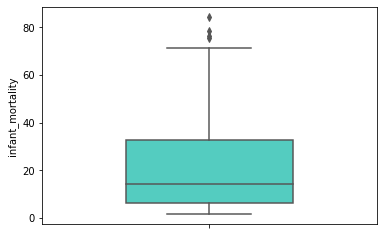

In [9]:
sns.boxplot(y = "infant_mortality", 
            data = df, 
            width = 0.5, 
            color = "turquoise")

In [10]:
def crear_categoria (num):

            
            if num <= 6.00:
                
                return 'baja'
            
            elif num > 6 and num <= 32.70:
                
                return 'media'
            
            else: 
                
                return 'alta'

In [11]:
df['infant_mortality'].apply (crear_categoria)

0       alta
1      media
2      media
3       baja
4       alta
       ...  
190    media
191    media
192     alta
193     alta
194     alta
Name: infant_mortality, Length: 195, dtype: object

In [12]:
df ['cat_mortalidad'] = df['infant_mortality'].apply (crear_categoria)
df.head(3)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent,cat_mortalidad
0,Afghanistan,60.00,AF,58.10,652.23,323.00,32.49,93.00,Kabul,8.67,149.90,2.30,AFN,4.47,2.10,0.70,19101353833.00,104.00,9.70,47.90,Kabul,64.50,638.00,0.43,Pashto,78.40,0.28,NaN,48.90,9.30,71.40,11.12,NaN,33.94,67.71,Asia,alta
1,Albania,105.00,AL,43.10,28.75,9.00,11.78,355.00,Tirana,4.54,119.05,1.40,ALL,1.62,28.10,1.36,15278077447.00,107.00,55.00,7.80,Tirana,78.50,15.00,1.12,Albanian,56.90,1.20,NaN,55.70,18.60,36.60,12.33,NaN,41.15,20.17,Europe,media
2,Algeria,18.00,DZ,17.40,NaN,317.00,24.28,213.00,Algiers,150.01,151.36,2.00,DZD,3.02,0.80,0.28,169988236398.00,109.90,51.40,20.10,Algiers,76.70,112.00,0.95,Arabic,28.10,1.72,NaN,41.20,37.20,66.10,11.70,NaN,28.03,1.66,Africa,media


In [13]:
df['cat_mortalidad'].value_counts()

media    94
alta     53
baja     48
Name: cat_mortalidad, dtype: int64

5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [14]:
columnas = ['fertility_rate', 'life_expectancy']
# En algun momento elimine la columa rating solf ￼
df1 = df[columnas]
df1.head()

,fertility_rate,life_expectancy
0,4.47,64.50
1,1.62,78.50
2,3.02,76.70
3,1.27,NaN
4,5.52,60.80


In [15]:
from itertools import combinations

# definimos la lista los nombres de las variables numéricas 
numericas = df1.select_dtypes(include = np.number).columns

# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))

# printeamos los resultados, una lista de tuplas
combinaciones

[('fertility_rate', 'life_expectancy')]

In [16]:
# creamos una función para identificar si las relaciones entre las variables son lienales o no
def identificar_linealidad (dataframe, lista_combinacion_columnas):
    """
   
    """
    relaciones_lineales = []
    relaciones_no_lineales = []

    for tupla in lista_combinacion_columnas: 
        # Realizar la prueba de normalidad
        _, p_value1 = kstest(dataframe[tupla[0]], "norm")
        _, p_value2 = kstest(dataframe[tupla[1]], "norm")

        if p_value1 > 0.05 and p_value2 > 0.05:
            relaciones_lineales.append(tupla)
        else:
            relaciones_no_lineales.append(tupla)

    return relaciones_lineales, relaciones_no_lineales

# llamamos a la funcion

lineal, no_lineal = identificar_linealidad(df, combinaciones)

print(f"Las variables a las que tengamos que aplicar la correlacion de pearson son: {lineal}")
print(f"Las variables a las que tengamos que aplicar la correlacion de spearman son: {no_lineal}")


Las variables a las que tengamos que aplicar la correlacion de pearson son: []
Las variables a las que tengamos que aplicar la correlacion de spearman son: [('fertility_rate', 'life_expectancy')]


In [17]:
# como todas las parejas de variables tienen relaciones no lineales, aplicaremos la correlación de Spearman a todo el DataFrame
df_correlaciones = df1.corr(method = "spearman")
df_correlaciones

,fertility_rate,life_expectancy
fertility_rate,1.00,-0.84
life_expectancy,-0.84,1.00


In [18]:
#ambas variables están fuertemente correlacionadas

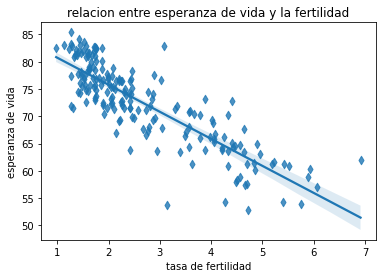

In [19]:
# creamos una gráfica usando el 'sns.regplot()' para evaluar la relación que existe entre dos variables numéricas
sns.regplot(x = "fertility_rate", 
            y = "life_expectancy", 
            data = df, 
            marker = "d")

# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("tasa de fertilidad")
plt.ylabel("esperanza de vida")

# ponemos título a la gráfica
plt.title("relacion entre esperanza de vida y la fertilidad");

In [20]:
# la linea de tendencia indica que existe una correlación negativa, es decir, a mayor tasa de fertilidad, menor esperanza de vida.

6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.

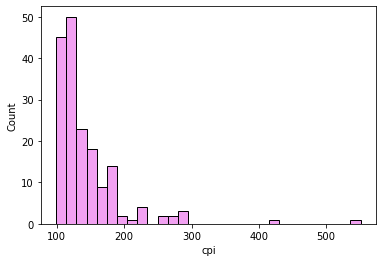

In [22]:
sns.histplot(x = "cpi", data = df, color = "violet");

7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

In [34]:
df ['diff']= df['gdp'] - df ['co2-emissions']
df ['diff']

0      19101353824.33
1      15278077442.46
2     169988236247.99
3       3154057518.00
4      94635415835.31
            ...      
190   482359318603.83
191   261921244650.33
192    26914402213.39
193    23064722440.86
194    21440758789.02
Name: diff, Length: 195, dtype: float64

In [41]:
df[df ['diff'] == df['diff']. max()]

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent,cat_mortalidad,diff
64,Germany,240.00,DE,47.70,357.02,180.00,9.50,49.00,Berlin,727.97,112.85,1.40,EUR,1.56,32.70,1.39,3845630030824.00,104.00,70.20,3.10,Berlin,80.90,7.00,9.99,German,12.50,4.25,NaN,60.80,11.50,48.80,3.04,NaN,51.17,10.45,Europe,baja,3845630030096.03


8. Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.

9. Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.

Recuerda proporcionar interpretaciones y conclusiones basadas en los resultados obtenidos en cada paso.